## Alpaca API Trading

### Selected 4 assets to construct a portfolio, namely, Apple stocks and 3 other ETF securities, SPDR S&P 500 ETF Trust, Vanguard 500 Index Fund ETF and Vanguard Total Bond Market Index Fund ETF. 

In [70]:
#imported libraries
import requests
import json
import pandas_datareader as web
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import mplfinance as fplt

In [71]:
#called data for Adjusted Closing price of assets.
def get_data(tickers):
    df = yf.download(tickers)["Adj Close"]
    df.columns = tickers
    df.ffill().dropna(inplace = True)
    return(df)

In [72]:
#called Alpaca Broker API 
API_KEY = "PKAFXSUMNDHG6RKLUCAF"
SECRET_KEY = "ZSMYUTPibqRt8aBkx9bI785e5x4ryRcNLMafD4Fi"
BASE_URL = "https://paper-api.alpaca.markets"
ACCOUNT_URL = BASE_URL + "/v2/account"
ORDERS_URL =  BASE_URL + "/v2/orders"

def stocks(symbol, quantity, side, type_, time_in_force):
    stocks_data = {
            "symbol": symbol,
            "qty": quantity,
            "side": side,
            "type": type_,
            "time_in_force": time_in_force
            }


    response = requests.post(ORDERS_URL, data=json.dumps(stocks_data), headers= {"ALPCA-API-KEY-ID": API_KEY,
        'APCA-API-SECRET-KEY': SECRET_KEY})
    return json.loads(response.content)


    

In [73]:
tickers = ["SPY", "BND", "VOO", "AAPL"]

In [74]:
#created a function with equal weights for all securities.
def equal_weight(tickers):
    optimal = [1/len(tickers) for i in range(len(tickers))]
    return optimal

In [75]:
#calculated returns
df_stocks = get_data(tickers)
returns = np.log(df_stocks / df_stocks.shift(1))
returns

[*********************100%%**********************]  4 of 4 completed


,SPY,BND,VOO,AAPL
Date,,,,
1980-12-12,NaN,NaN,NaN,NaN
1980-12-15,-0.053581,NaN,NaN,NaN
1980-12-16,-0.076231,NaN,NaN,NaN
1980-12-17,0.024450,NaN,NaN,NaN
1980-12-18,0.028580,NaN,NaN,NaN
...,...,...,...,...
2024-01-08,0.023887,0.004389,0.014175,0.014202
2024-01-09,-0.002266,-0.000137,-0.001518,-0.002433
2024-01-10,0.005655,-0.001781,0.005639,0.006575


In [76]:
df_stocks

,SPY,BND,VOO,AAPL
Date,,,,
1980-12-12,0.099319,NaN,NaN,NaN
1980-12-15,0.094137,NaN,NaN,NaN
1980-12-16,0.087228,NaN,NaN,NaN
1980-12-17,0.089387,NaN,NaN,NaN
1980-12-18,0.091978,NaN,NaN,NaN
...,...,...,...,...
2024-01-08,185.559998,73.070000,474.600006,436.130005
2024-01-09,185.139999,73.059998,473.880005,435.070007
2024-01-10,186.190002,72.930000,476.559998,437.940002


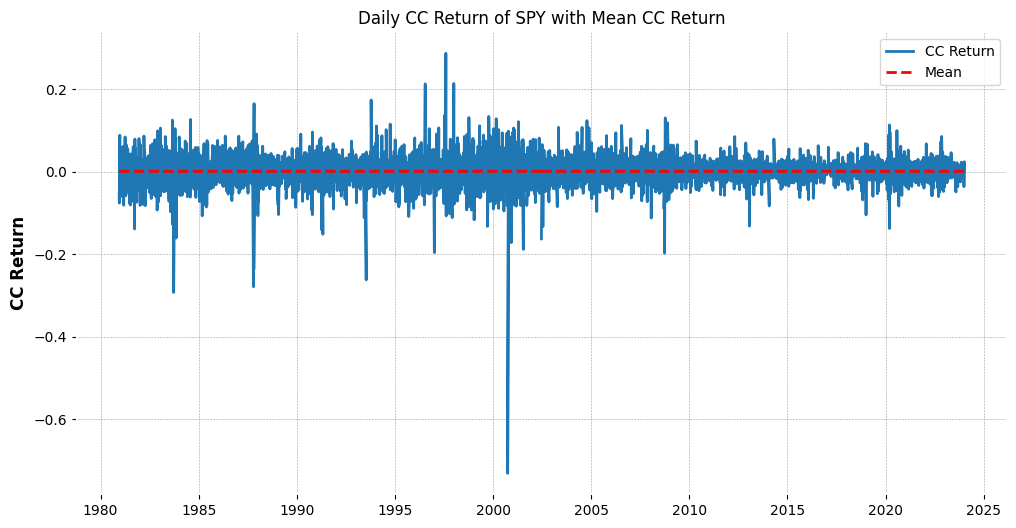

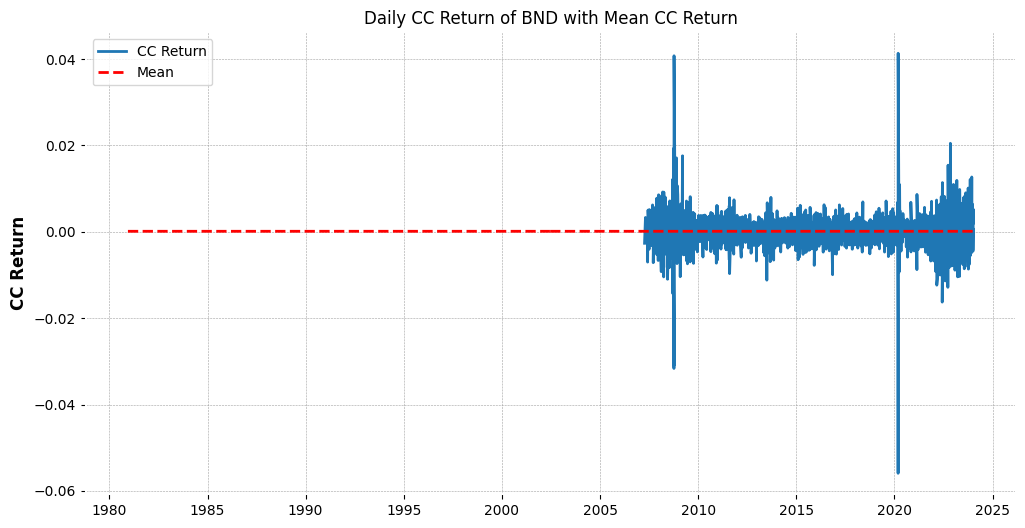

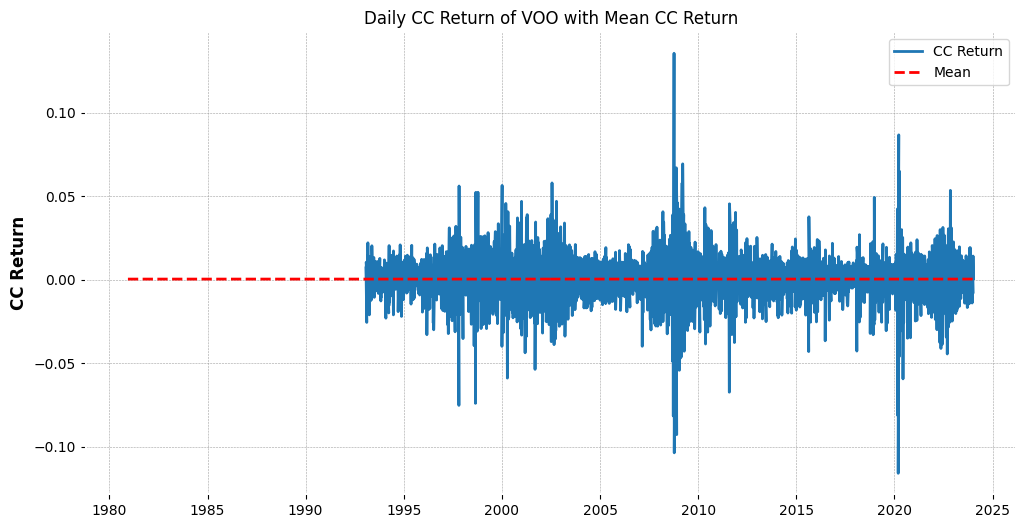

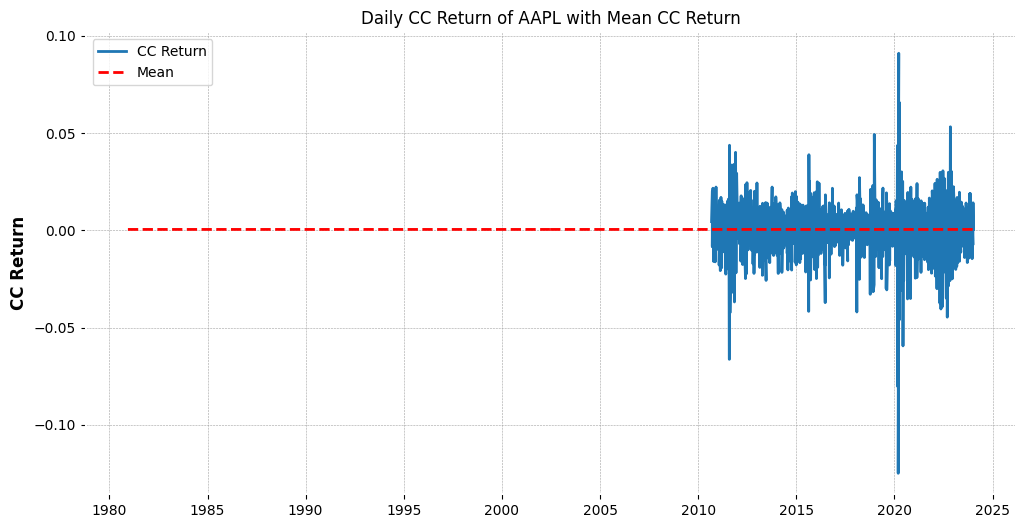

In [77]:
#Mean Continuously Compounding returns
for ticker in tickers: 
    df_stocks[f'{ticker}_CC_returns'] = np.log(np.array(df_stocks[ticker][1:])/df_stocks[ticker][:-1])
    df_stocks[f'{ticker}_mean_CC_return'] = np.mean(df_stocks[f'{ticker}_CC_returns'][:-1])
    
    plt.figure(figsize=(12,6))
    plt.plot(f'{ticker}_CC_returns', data=df_stocks[:-1]) 
    plt.plot(f'{ticker}_mean_CC_return', 'r--', data=df_stocks[:-1]) 
    plt.ylabel('CC Return')
    plt.legend(('CC Return', 'Mean'))
    plt.title(f'Daily CC Return of {ticker} with Mean CC Return')
    plt.show()


In [78]:
#Calling data for tickers for candle Stick graph
def data(tickers):
    dt = yf.download(tickers, start='2014-01-01', 
                      end='2023-12-29', 
                      interval='1d',
                      progress=False)
    dt.ffill().dropna(inplace = True)
    return(dt)
tickers = ["SPY", "BND", "VOO", "AAPL"]
assets = data(tickers)
assets.head()


Adj Close                                         Close  \
                 AAPL        BND         SPY         VOO       AAPL   
Date                                                                  
2014-01-02  17.318729  61.362770  152.669144  140.151871  19.754642   
2014-01-03  16.938303  61.370464  152.644104  140.026443  19.320715   
2014-01-06  17.030672  61.424118  152.201782  139.675293  19.426071   
2014-01-07  16.908875  61.500637  153.136520  140.544861  19.287144   
2014-01-08  17.015959  61.301517  153.169937  140.603333  19.409286   

                                                    High             ...  \
                  BND         SPY         VOO       AAPL        BND  ...   
Date                                                                 ...   
2014-01-02  80.120003  182.919998  167.630005  19.893929  80.180000  ...   
2014-01-03  80.129997  182.889999  167.479996  19.775000  80.209999  ...   
2014-01-06  80.199997  182.360001  167.059998  19.528570  80.260002  ...   
2014-01-07  80.300003  183.479996  168.100006  19.498571  80.300003  ...   
2014-01-08  80.040001  183.520004  168.169998  19.484285  80.160004  ...   

                   Low                   Open                         \
                   SPY         VOO       AAPL        BND         SPY   
Date                                                                   
2014-01-02  182.479996  167.199997  19.845715  80.099998  183.979996   
2014-01-03  182.630005  167.330002  19.745001  80.080002  183.229996   
2014-01-06  182.080002  166.820007  19.194643  80.199997  183.490005   
2014-01-07  182.949997  167.630005  19.440001  80.269997  183.089996   
2014-01-08  182.889999  167.550003  19.243214  80.139999  183.449997   

                           Volume                               
                   VOO       AAPL      BND        SPY      VOO  
Date                                                            
2014-01-02  168.529999  234684800  1413300  119636900  1731300  
2014-01-03  167.880005  392467600  1577300   81390600  1710500  
2014-01-06  168.110001  412610800  1287400  108028200  1339000  
2014-01-07  167.729996  317209200  2719600   86144200   824700  
2014-01-08  168.070007  258529600  3472700   96582300  3147500  

[5 rows x 24 columns]

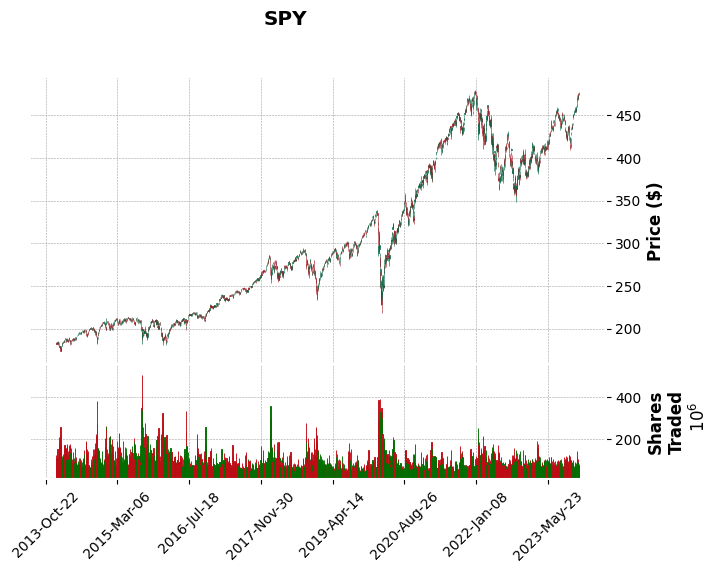

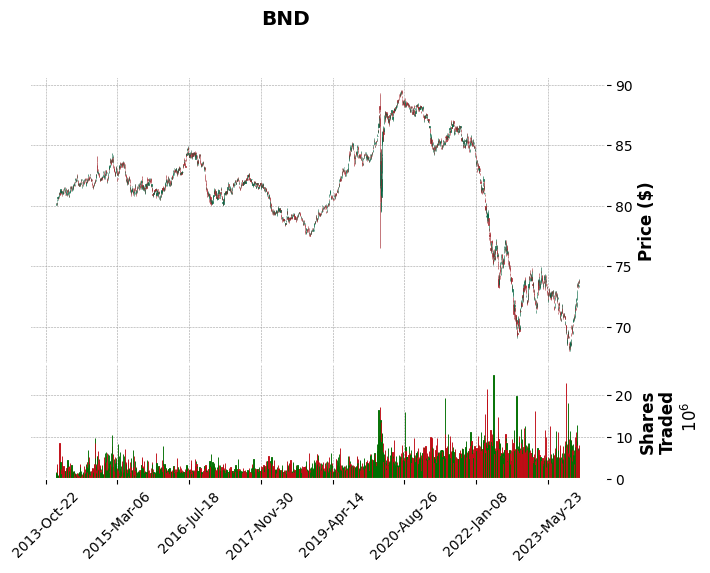

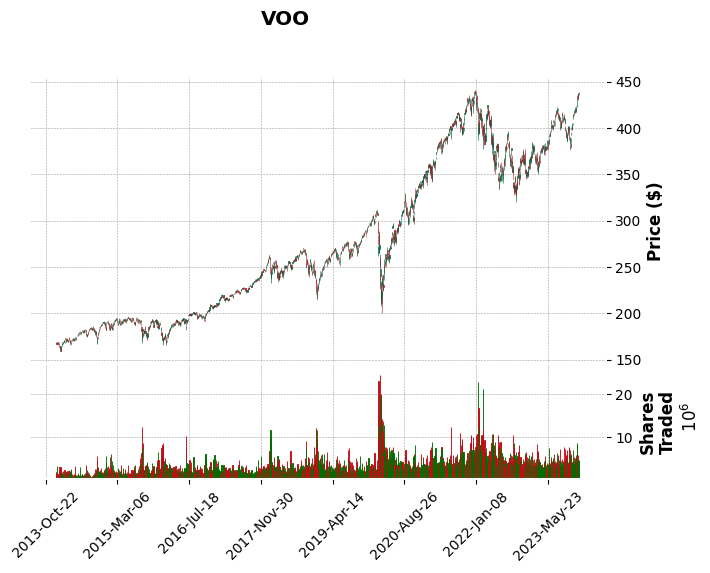

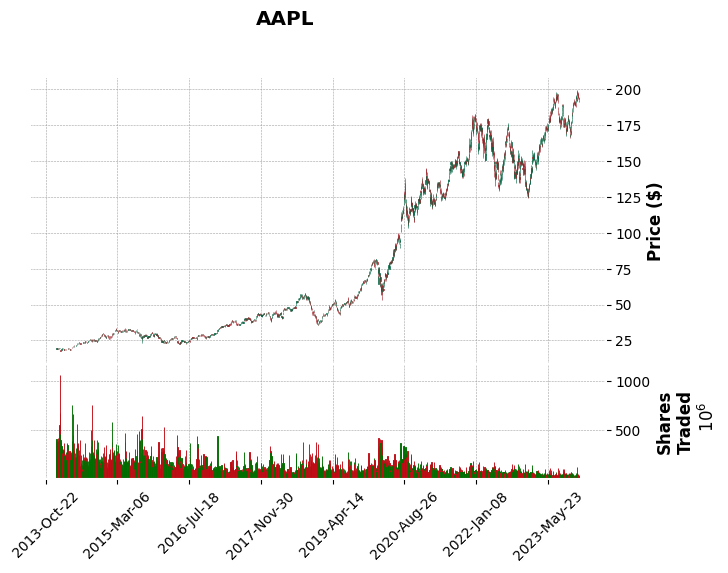

In [79]:
# Candle Stick Plot to analyse the trend in securities' prices. 
for ticker in tickers: 
    df_ticker = pd.DataFrame({
        'Open': assets['Open', ticker],
        'Close': assets['Close', ticker],
        'High': assets['High', ticker],
        'Low': assets['Low', ticker],
        'Volume': assets['Volume', ticker],
    })

    fplt.plot(
        df_ticker,
        type='candle',
        title=f'{ticker}',
        style='charles',
        ylabel='Price ($)',
        volume=True,
        ylabel_lower='Shares\nTraded',
        show_nontrading=True,
         warn_too_much_data=len(df_ticker),
    )


In [80]:
#calculated minimum variance portfolio with the 4 securities.
def minimum_variance(returns):
    def find_port_variance(weights):
        # this is actually std
        cov = returns.cov()
        port_var = np.sqrt(np.dot(weights.T, np.dot(cov, weights)) * 250)
        return port_var

    def weight_cons(weights):
        return np.sum(weights) - 1


    bounds_lim = [(0, 1) for x in range(len(returns.columns))] # change to (-1, 1) if you want to short
    init = [1/len(returns.columns) for i in range(len(returns.columns))]
    constraint = {'type': 'eq', 'fun': weight_cons}

    optimal = minimize(fun=find_port_variance,
                       x0=init,
                       bounds=bounds_lim,
                       constraints=constraint,
                       method='SLSQP'
                       )

    return list(optimal['x'])

In [81]:
equal_w=equal_weight(tickers)
equal_w

[0.25, 0.25, 0.25, 0.25]

In [82]:
min_var_w=minimum_variance(returns)
min_var_w

[0.00018777827990091746,
 0.9188034851392441,
 0.06292607821418948,
 0.018082658366665522]

minVarWeights = get_minimum_variance_weights(tickers)
minVarWeights

In [83]:
#created a function to purchase the correct amount of assets based on the minimum variance portfolio with BrokerAPI. 
tickers = ["SPY", "BND", "VOO", "AAPL"]
df_stocks = get_data(tickers)
minVarWeights = min_var_w

r = requests.get(ACCOUNT_URL, headers = {'APCA-API-KEY-ID': API_KEY,
                                         'APCA-API-SECRET-KEY':  SECRET_KEY})

info = json.loads(r.content)
accountval = float(info["cash"])

shares = []
for i, symbol in enumerate(tickers):
    weight = minVarWeights[i]
    price = df_stocks[symbol][-1]
    qty = (weight*accountval)/price
    qty = qty//1
    shares.append(qty)
#purchase    
for i, symbol in enumerate(tickers):
    qty = shares[i]

    stocks(symbol, qty, "buy", "market", "gtc")

[*********************100%%**********************]  4 of 4 completed


In [84]:
#number of shares to be purchased based on the above assessment for minimum variance portfolio
shares

[0.0, 23.0, 0.0, 0.0]

As per our analysis we need to purchase, 0 SPY, 1252 BND, 13 VOO and 4 AAPL, number of securities for minimum variance portfolio. 